In [6]:
from sklearn import datasets
digit = datasets.load_digits()

In [7]:
digit.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [8]:
x = digit.data
y = digit.target

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.svm import SVC

model = SVC()

In [17]:

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

In [18]:
parm ={'kernel':('linear','rbf'),'C':[1,10]}

In [19]:
clf = GridSearchCV(model,parm,cv=5)

In [20]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
clf.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [335]:
clf = clf.fit(x_train,y_train)

In [336]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [337]:
pred = clf.predict(x_test)

In [338]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [340]:
print(classification_report(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      0.98      0.98        49
           2       1.00      1.00      1.00        32
           3       0.97      1.00      0.99        35
           4       1.00      1.00      1.00        35
           5       0.96      0.96      0.96        28
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        29
           8       0.97      0.97      0.97        40
           9       1.00      1.00      1.00        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 27,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

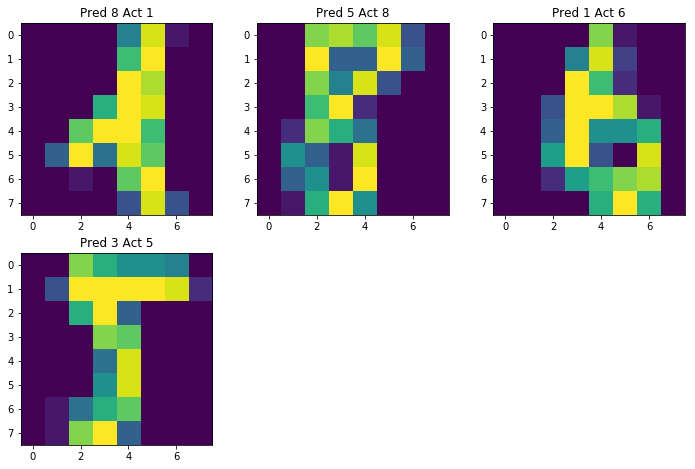

In [354]:


# combine pred and actual 

c = np.dstack((pred,y_test))
c = c.reshape(c.shape[1],c.shape[2])

# find index where pred and actual not equal
t, = np.where(c[:,0]!=c[:,1])

# figure out the size of the plot
z = round(len(t) ** 0.5,0) + 1

# create plots
plt.figure(figsize=(12,12))

for i in range(len(t)):
    plt.subplot(z,z,i+1)
    plt.imshow(x_test[t[i]].reshape(8,8))
    plt.title('Pred %s' %(pred[t[i]]) + ' Act %s' %(y_test[t[i]]))




In [363]:
myval = np.repeat(250,10)

In [364]:
mydate = pd.date_range('2019-10-01',periods=10, freq='14D')

In [371]:
df = pd.DataFrame({'Date':mydate,'Forecast':myval})

In [375]:
df.Forecast>20

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Forecast, dtype: bool

In [376]:
import os
os.getcwd()

'C:\\Users\\m118954.CORPAU'

In [377]:
mypath = 'H:\\M118954\SharedLaptop\Pribadi\CBAStatements'

In [388]:
df = pd.read_csv('H:\SharedLaptop\Pribadi\CBAStatements\CSVData.csv',header=None)

df.columns=['Date','Amount','Desc','Balance']

In [404]:
df[df['Desc'].str.contains('harcourt',case=False)]

,Date,Amount,Desc,Balance
124,17/06/2019,2454.25,Direct Credit 515965 HARCOURTS ROUSE TRANSFER ...,31831.43
159,15/05/2019,1693.29,Direct Credit 515965 HARCOURTS ROUSE TRANSFER ...,31750.55
174,30/04/2019,1457.00,Direct Credit 515965 HARCOURTS ROUSE TRANSFER ...,31500.68
193,15/04/2019,1225.75,Direct Credit 515965 HARCOURTS ROUSE TRANSFER ...,31835.06


In [405]:
df['Grouping'] = 'Other'

In [408]:
df[df['Desc'].str.contains('harcourt',case=False),df['Grouping']] = 'The Ponds'

TypeError: 'Series' objects are mutable, thus they cannot be hashed